# Vulcain Nozzle Extension

This is an extension of the 'Vulcain Combustion Chamber.ipynb' notebook, but here we will attempt to model the dump-cooled nozzle extension here.


### References:

- [1] - Kirner et al 1993, Development Status of the Vulcain Thrust Chamber (http://ftp.demec.ufpr.br/CFD/bibliografia/propulsao/kirner_et_al_1993.pdf)
- [2] - Nydén et al 1991, Development of the HM60-Vulcain nozzle extension (https://arc.aiaa.org/doi/10.2514/6.1991-2566)
- [3] - LeBail et al 1993, Numerical analysis of high aspect ratio cooling passage flow and heat transfer (https://arc.aiaa.org/doi/pdf/10.2514/6.1993-1829)
- [4] - High Temp Metals, Inconel 600 Technical Data, (https://www.hightempmetals.com/techdata/hitempInconel600data.php)

In [95]:
import bamboo as bam
import pypropep as ppp
from CoolProp.CoolProp import PropsSI
import cantera as ct
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 130

### Collect Vulcain data

Using a an online graph image-to-data converter (http://www.graphreader.com/), we can obtain the raw data from Deutsche Aerospace.

In [96]:
# Coolant temperature in K [1]
coolant_temperature_data = {"x":[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1,1.01,1.02,1.03,1.04,1.05,1.06,1.07,1.08,1.09,1.1,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.2,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,1.3,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.4,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.48,1.49,1.5,1.51,1.52,1.53,1.54,1.55,1.56,1.57,1.58,1.59,1.6,1.61,1.62,1.63,1.64,1.65,1.66,1.67,1.68,1.69,1.7,1.71,1.72,1.73,1.74,1.75,1.76,1.77],
                            "y":[49.444,56.519,63.594,70.669,77.744,84.819,91.894,98.969,106.044,113.119,120.194,127.269,134.343,141.418,148.221,154.286,160.35,166.414,172.479,178.543,184.607,190.671,196.736,202.8,208.864,214.928,220.993,227.057,233.121,239.186,245.25,251.314,257.378,263.443,269.507,275.571,281.635,287.573,293.206,298.839,304.472,310.104,315.737,321.37,327.003,332.635,338.268,343.901,349.534,355.167,360.799,366.432,372.065,377.698,383.33,388.57,393.439,398.308,403.176,408.045,412.913,417.782,422.651,427.519,432.388,437.256,442.125,446.994,451.862,456.731,461.6,466.468,471.337,476.205,481.074,485.943,490.811,495.68,500.548,505.417,510.286,515.154,519.475,523.787,528.098,532.409,536.721,541.032,545.343,549.655,553.966,558.277,562.589,566.9,571.211,575.522,579.834,584.145,588.456,592.768,597.079,601.39,605.702,609.965,613.794,617.623,621.452,625.282,629.111,632.94,636.769,640.599,644.428,648.257,652.086,655.915,659.745,663.574,667.403,671.232,675.062,678.891,682.72,686.549,690.379,694.208,698.037,701.866,705.696,709.525,712.847,715.785,718.723,721.661,724.599,727.537,730.475,733.413,736.35,739.288,742.226,745.164,748.102,751.04,753.978,756.916,759.854,762.792,765.73,768.668,771.605,774.543,777.481,780.419,783.357,786.295,789.233,792.171,795.109,798.047,800.985,803.923,806.86,809.798,812.736,815.674,818.612,821.55,824.488,827.426,830.364,833.302,836.24,839.178,842.116,845.053,847.991,850.929]}

# Engine contour (m) - up to the beginning of the nozzle extension [1]
chamber_geometry = {"x":[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69],
                    "y":[0.209,0.209,0.209,0.209,0.209,0.209,0.209,0.209,0.209,0.209,0.208,0.207,0.206,0.204,0.202,0.2,0.198,0.196,0.193,0.191,0.188,0.185,0.183,0.18,0.177,0.175,0.172,0.169,0.166,0.164,0.161,0.158,0.156,0.153,0.15,0.146,0.143,0.139,0.134,0.13,0.127,0.126,0.128,0.133,0.138,0.145,0.151,0.158,0.164,0.171,0.178,0.185,0.191,0.198,0.205,0.212,0.218,0.225,0.232,0.238,0.245,0.252,0.258,0.265,0.271,0.277,0.282,0.287,0.292]}

extension_geometry = {"x":[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1,1.01,1.02,1.03,1.04,1.05,1.06,1.07,1.08,1.09,1.1,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.2,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,1.3,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.4,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.48,1.49,1.5,1.51,1.52,1.53,1.54,1.55,1.56,1.57,1.58,1.59,1.6,1.61,1.62,1.63,1.64,1.65,1.66,1.67,1.68,1.69,1.7,1.71,1.72,1.73,1.74,1.75,1.76,1.77,1.78],
                      "y":[0.305,0.312,0.318,0.325,0.331,0.338,0.343,0.349,0.354,0.359,0.365,0.37,0.375,0.381,0.386,0.391,0.397,0.402,0.408,0.413,0.418,0.423,0.428,0.433,0.438,0.443,0.448,0.453,0.457,0.462,0.467,0.472,0.477,0.482,0.487,0.492,0.497,0.501,0.506,0.511,0.516,0.521,0.525,0.529,0.533,0.537,0.54,0.544,0.548,0.552,0.556,0.56,0.564,0.568,0.572,0.576,0.58,0.584,0.588,0.592,0.596,0.599,0.603,0.607,0.611,0.615,0.618,0.621,0.625,0.628,0.631,0.635,0.638,0.641,0.645,0.648,0.651,0.654,0.658,0.661,0.664,0.668,0.671,0.674,0.678,0.681,0.684,0.686,0.689,0.692,0.694,0.697,0.7,0.702,0.705,0.708,0.71,0.713,0.716,0.718,0.721,0.724,0.726,0.729,0.732,0.734,0.737,0.739,0.742,0.744,0.747,0.749,0.751,0.754,0.756,0.759,0.761,0.764,0.766,0.768,0.771,0.773,0.776,0.778,0.78,0.783,0.785,0.788,0.79,0.792,0.794,0.796,0.798,0.8,0.802,0.804,0.806,0.808,0.81,0.812,0.814,0.816,0.818,0.82,0.822,0.824,0.826,0.827,0.829,0.831,0.833,0.835,0.837,0.838,0.84,0.841,0.843,0.845,0.846,0.848,0.849,0.851,0.852,0.854,0.855,0.857,0.858,0.86,0.861,0.863,0.864,0.866,0.867,0.869,0.871,0.872,0.874,0.875,0.877]}

# Shift the extension geometry data, then combine with the chamber data
extension_geometry["x"] = list( np.array(extension_geometry["x"]) + chamber_geometry["x"][-1] )
coolant_temperature_data["x"] = list( np.array(coolant_temperature_data["x"]) + chamber_geometry["x"][-1] )


engine_contour = {}
engine_contour["x"] = chamber_geometry["x"] + extension_geometry["x"]
engine_contour["y"] = chamber_geometry["y"] + extension_geometry["y"]

# Cooling channel
coolant_inlet_p0 = 137.9e5          # Coolant inlet pressure [3] (guess that p0 ~= p)
mdot_coolant = 5.3                  # Coolant mass flow rate [1] (guess around the middle of Figure 12)
k_wall = 19.2                       # Wall thermal conductivity [4] for Inconel 600 [1]
wall_thickness = 0.4e-3             # Wall thickness between coolant and exhaust gas [2]
number_of_channels = 456            # Number of channels [2]
channel_height = 3.2e-3             # Height of cooling channels [2]
blockage_ratio = 0.2                # Fraction of cooling channel flow area that is blocked by fins/walls [2]

# Experimental data
experimental_T_in = 48.035      # Experimental coolant inlet temperature, K [1]
experimental_T_out = 871.907    # Experimental coolant outlet temperature, K [1]

### Get chamber conditions

Use pypropep. The Vulcain uses a liquid oxygen and liquid hydrogen fed system.

In [97]:
thrust = 1007.7e3   # Vacuum thrust, N [1]
isp = 439*9.81      # Specific impulse, m/s [1]
pc = 100e5          # Chamber pressure, bar [1]
OF_ratio = 5.6      # O/F ratio (seems to be by mass) [1]

expected_mdot = thrust / isp

# Use pypropep to get chamber temperature
ppp.init()
p_froz = ppp.FrozenPerformance()
lox = ppp.PROPELLANTS['OXYGEN (LIQUID)']
lh2 = ppp.PROPELLANTS['HYDROGEN (CRYOGENIC)']

# Add propellants by mass fractions
p_froz.add_propellants_by_mass([(lox, OF_ratio), (lh2, 1)])

# Adiabatic combustion using chamber pressure                      
p_froz.set_state(P = pc/1e5, Pe = 1)   

# Get results - use throat conditions for gamma and cp! Otherwise the perfect gas model deviates a lot from equilibrium calculations.
gamma = p_froz.properties[1].Isex   # pyrpopep uses 'Isex' for the ratio of specific heats. Index 1 means throat conditions
cp = 1000*p_froz.properties[1].Cp   # Cp is given in kJ/kg/K, we want J/kg/K
Tc = p_froz.properties[0].T         # Index 0 means chamber conditions

print(f"Chamber temperature = {Tc} K")

print("\nCombustion product composition:")
print(p_froz.composition["throat"])

Loaded 1921 thermo species
Loaded 1031 propellants
Chamber temperature = 3459.2606127242298 K

Combustion product composition:
[('H2O', 0.6493671319106238), ('H2', 0.2896925690851782), ('OH', 0.028980423622929952), ('H', 0.028801796474919292), ('O', 0.0016810512414820072), ('O2', 0.0014520541971763574), ('HO2', 1.7031381331243065e-05), ('H2O2', 7.94208687267654e-06), ('O3', 0.0)]


### Bamboo engine model

First set up the perfect gas model, the geometry, and combustion chamber conditions. Use this to get the mass flow rate of exhaust gas.

In [98]:
# Set up the chamber conditions and geometry
perfect_gas = bam.PerfectGas(gamma = gamma, cp = cp)   
chamber_conditions = bam.ChamberConditions(p0 = pc, T0 = Tc)
geometry = bam.Geometry(xs = engine_contour["x"], ys = engine_contour["y"])

# Set up an engine quickly just to get our perfect gas mass flow rate (used later)
engine = bam.Engine(perfect_gas = perfect_gas, 
                    chamber_conditions = chamber_conditions, 
                    geometry = geometry)

Now use Cantera to get the exhaust gas transport properties, and CoolProp to get the coolant transport properties.

In [99]:
# Setup the exhaust gas transport properties using Cantera
gas = ct.Solution('gri30.yaml')
gas.TPY = Tc, pc, f"H2:{1}, O2:{OF_ratio}"
gas.equilibrate("TP")

def mu_exhaust(T, p):
    gas.TP = T, p
    return gas.viscosity

def k_exhaust(T, p):
    gas.TP = T, p
    return gas.thermal_conductivity

def Pr_exhaust(T, p):
    gas.TP = T, p
    return gas.cp * gas.viscosity / gas.thermal_conductivity # Definition of Prandtl number

exhaust_transport = bam.TransportProperties(Pr = Pr_exhaust,
                                            mu = mu_exhaust,
                                            k = k_exhaust)

# Set up the coolant transport properties using CoolProp
# Round temperatures up to 12 K - CoolProp seems unhappy below this for LH2
def Pr_coolant(T, p):
    if T < 12:
        T = 12
    return PropsSI("PRANDTL", "T", T, "P", p, "HYDROGEN")

def mu_coolant(T, p):
    if T < 12:
        T = 12
    return PropsSI("VISCOSITY", "T", T, "P", p, "HYDROGEN")

def k_coolant(T, p):
    if T < 12:
        T = 12
    return PropsSI("CONDUCTIVITY", "T", T, "P", p, "HYDROGEN")

def cp_coolant(T, p):
    if T < 12:
        T = 12
    return PropsSI("CPMASS", "T", T, "P", p, "HYDROGEN") 

def rho_coolant(T, p):
    if T < 12:
        T = 12
    return PropsSI("DMASS", "T", T, "P", p, "HYDROGEN") 

# Note that H2 doesn't seem to exactly 'boil-off' in the state it's in - it's supercritical
coolant_transport = bam.TransportProperties(Pr = Pr_coolant,
                                            mu = mu_coolant,
                                            k = k_coolant,
                                            cp = cp_coolant,
                                            rho = rho_coolant)

Put the final pieces together, set up the `Engine` object, and plot the geometry.

In [100]:
cooling_jacket = bam.CoolingJacket(T_coolant_in = coolant_temperature_data["y"][0],                           
                                   p0_coolant_in = coolant_inlet_p0, 
                                   coolant_transport = coolant_transport, 
                                   mdot_coolant = mdot_coolant, 
                                   configuration = "vertical", 
                                   channel_height = channel_height,
                                   number_of_fins = number_of_channels,
                                   blockage_ratio = blockage_ratio,
                                   xs = [extension_geometry["x"][0], extension_geometry["x"][-1]])

wall = bam.Wall(material = bam.Material(k = k_wall), thickness = wall_thickness)

engine = bam.Engine(perfect_gas = perfect_gas, 
                    chamber_conditions = chamber_conditions, 
                    geometry = geometry,
                    cooling_jacket = cooling_jacket,
                    exhaust_transport = exhaust_transport,
                    walls = wall)

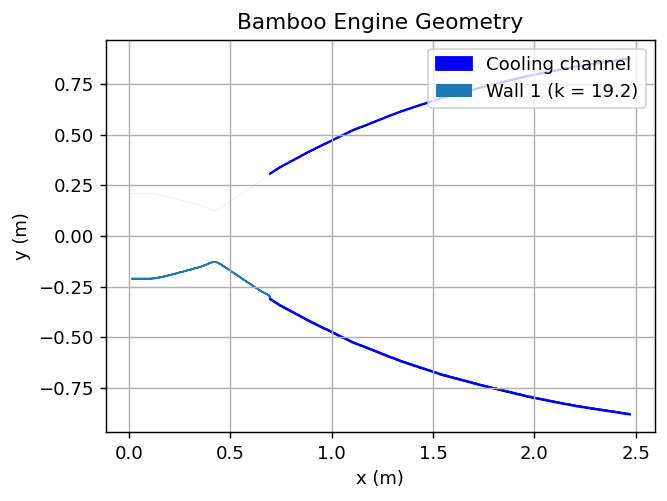

In [101]:
engine.plot()
plt.title("Bamboo Engine Geometry")
plt.show()

In [102]:
# Run simulation
bamboo_data = engine.steady_heating_analysis(counterflow = False)

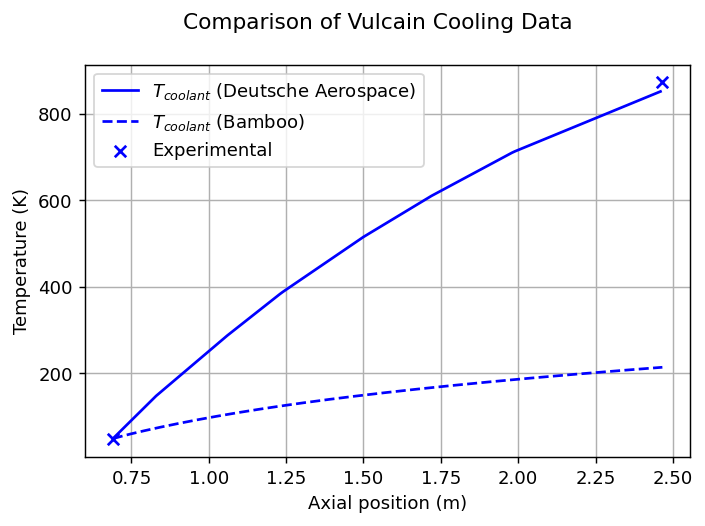

Experimental coolant exit temperature (Deutsche Aerospace) = 871.91 K
Predicted coolant exit temperature (Bamboo) = 214.27 K
Percentage error in coolant exit temperature = 75.42%



In [103]:
# Compare results with data from paper
fig, ax = plt.subplots()
fig.suptitle("Comparison of Vulcain Cooling Data")

# Plot coolant temperatures      
ax.plot(coolant_temperature_data["x"], 
         coolant_temperature_data["y"], 
         label = r"$T_{coolant}$ (Deutsche Aerospace)", 
         color= "blue")

ax.plot(bamboo_data["x"], bamboo_data["T_coolant"], 
         label= r"$T_{coolant}$ (Bamboo)", 
         color= "blue", 
         linestyle = "--")

# Plot their experimental datapoints
ax.scatter(bamboo_data["x"][0], experimental_T_in, s = 40, marker = 'x', color = "blue")
ax.scatter(bamboo_data["x"][-1], experimental_T_out, s = 40, marker = 'x', color = "blue", label = "Experimental")

# Formatting
ax.set_ylabel("Temperature (K)")
ax.set_xlabel("Axial position (m)")
ax.grid()
ax.legend()
plt.show()

print(f'Experimental coolant exit temperature (Deutsche Aerospace) = {experimental_T_out:.2f} K')
print(f'Predicted coolant exit temperature (Bamboo) = {bamboo_data["T_coolant"][-1]:.2f} K')
percent_error = 100*(bamboo_data["T_coolant"][-1] - experimental_T_out)/experimental_T_out
print(f'Percentage error in coolant exit temperature = {abs(percent_error):.2f}%\n')